In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("dark_background")  




In [33]:
df = pd.DataFrame({
    "Região": ["Sul", "Sudeste", "Nordeste", "Norte", "Centro-Oeste"],
    "Faturamento": [120000, 95000, 70000, 50000, 60000]
})


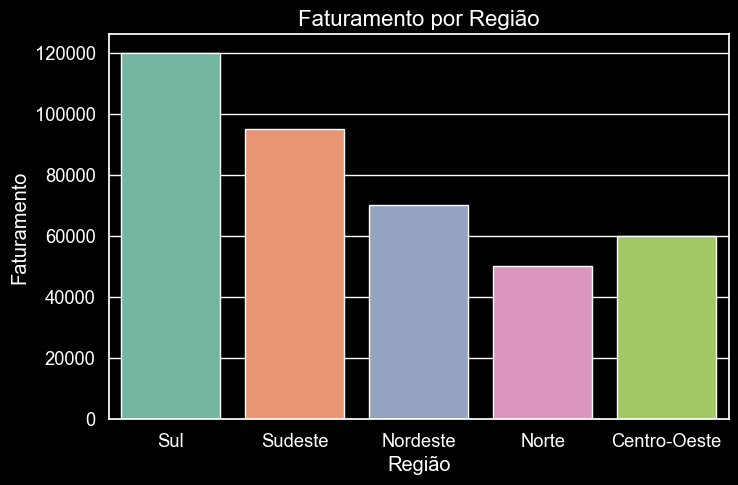

In [34]:
cores = sns.color_palette("Set2", n_colors=len(df))

plt.figure(figsize=(8,5))
sns.barplot(
    x="Região", 
    y="Faturamento", 
    hue="Região",           
    data=df, 
    palette=cores, 
    legend=False
)

plt.title("Faturamento por Região", fontsize=16, color="white")
plt.xlabel("Região", color="white")
plt.ylabel("Faturamento", color="white")

plt.show()


In [ ]:
# Carregar o arquivo CSV
df = pd.read_csv("dataset/vendas.csv")

# Mostrar as primeiras linhas
df.head()


,OrderID,Product,Category,Quantity,Price,OrderDate,CustomerID,Region
0,1,Tênis Esportivo,Calçados,5,58.61,2025-05-22,166,Centro-Oeste
1,2,Jaqueta,Roupas,2,302.10,2025-04-21,177,Sul
2,3,Fone de Ouvido,Eletrônicos,2,653.05,2025-02-26,159,Nordeste
3,4,Jaqueta,Roupas,2,420.74,2025-01-26,193,Sul
4,5,Notebook,Eletrônicos,4,788.18,2025-03-04,197,Sul


In [ ]:
# Informações gerais
df.info()

# Estatísticas descritivas
df.describe()

# Mostrar se há valores nulos
df.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OrderID     100 non-null    int64  
 1   Product     100 non-null    object 
 2   Category    100 non-null    object 
 3   Quantity    100 non-null    int64  
 4   Price       100 non-null    float64
 5   OrderDate   100 non-null    object 
 6   CustomerID  100 non-null    int64  
 7   Region      100 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


OrderID       0
Product       0
Category      0
Quantity      0
Price         0
OrderDate     0
CustomerID    0
Region        0
dtype: int64

In [37]:
# Criar coluna de Faturamento
df['Faturamento'] = df['Quantity'] * df['Price']

# Converter OrderDate para datetime
df['OrderDate'] = pd.to_datetime(df['OrderDate'])


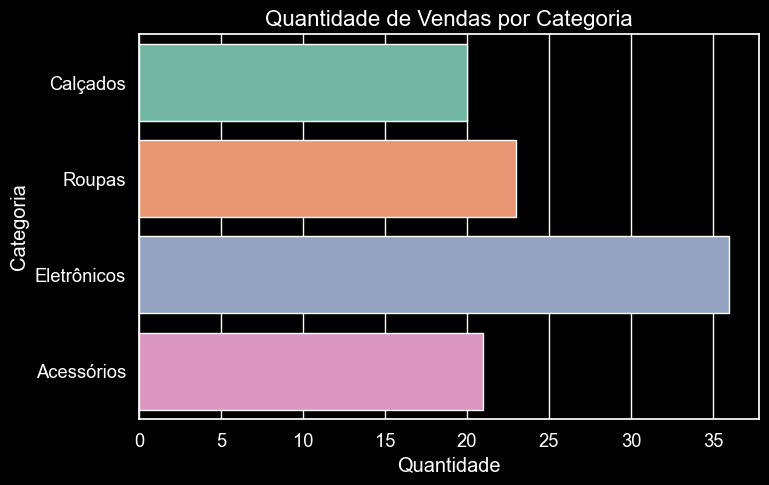

In [42]:
# Quantidade de vendas por categoria
cores_cat = sns.color_palette("Set2", n_colors=df['Category'].nunique())

plt.figure(figsize=(8,5))
sns.countplot(
    y='Category',
    data=df,
    hue='Category',        # novo: garante o uso de palette corretamente
    palette=cores_cat,
    legend=False           # remove legenda duplicada
)

plt.title("Quantidade de Vendas por Categoria", fontsize=16, color="white")
plt.xlabel("Quantidade", color="white")
plt.ylabel("Categoria", color="white")
plt.show()




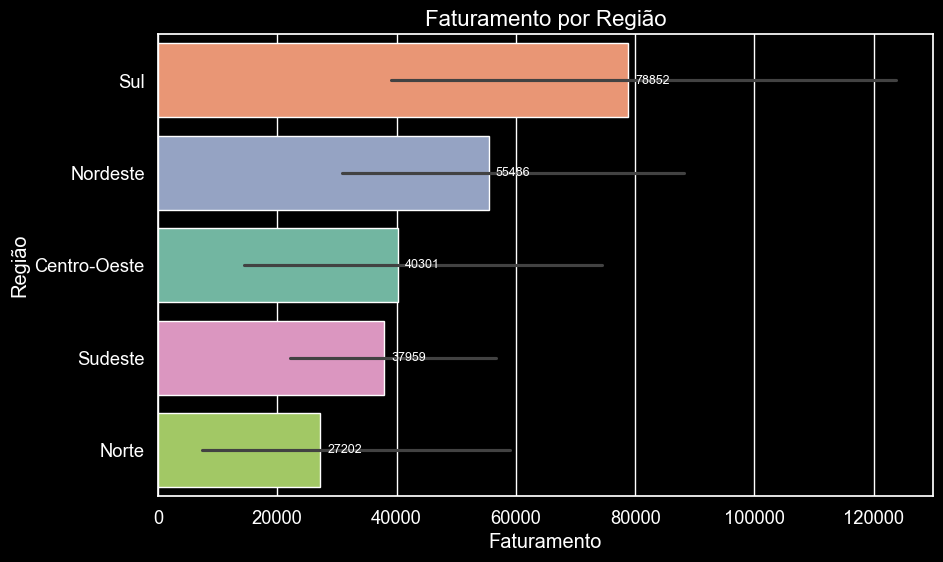

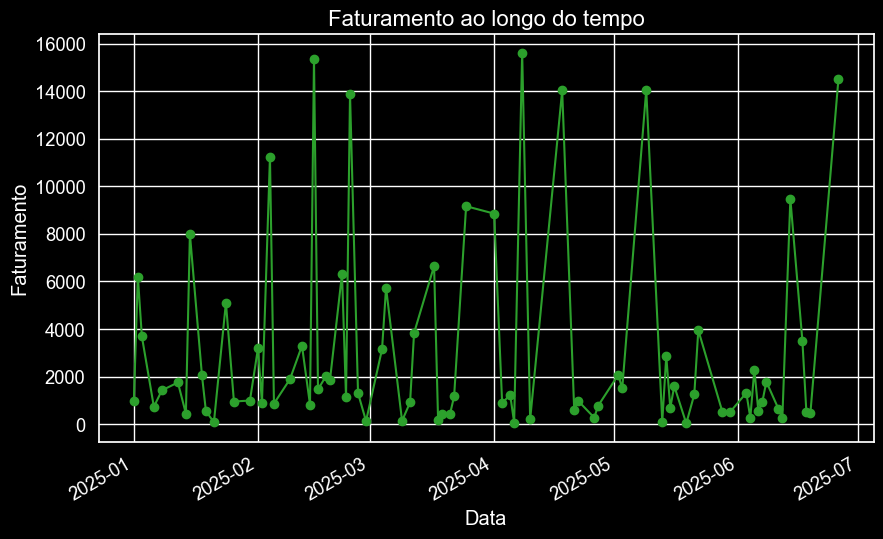

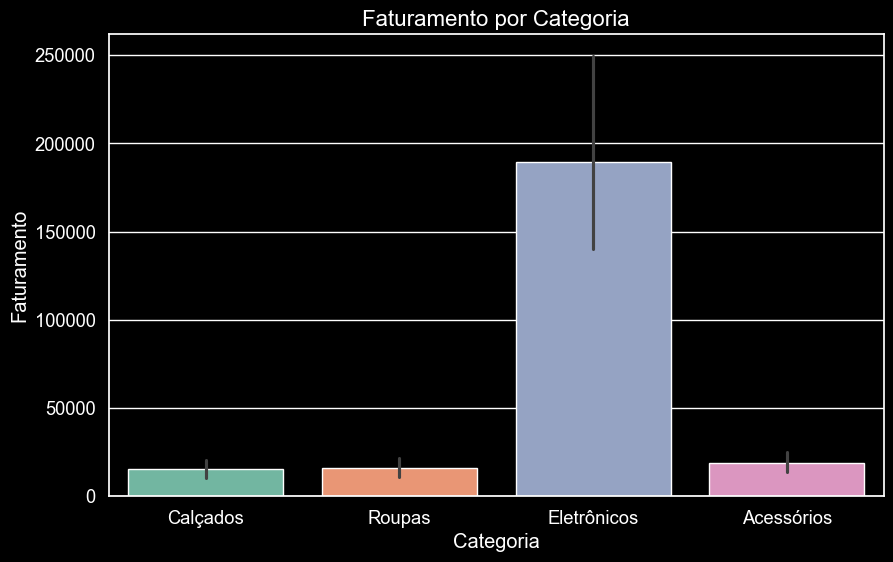

In [ ]:

# Faturamento por Região 

cores_regiao = sns.color_palette("Set2", n_colors=df['Region'].nunique())

plt.figure(figsize=(10,6))
sns.barplot(
    y='Region',
    x='Faturamento',
    data=df,
    estimator=sum,
    hue="Region",              # necessário para usar palette
    dodge=False,               # evita barras duplicadas
    palette=cores_regiao,
    order=df.groupby('Region')['Faturamento'].sum().sort_values(ascending=False).index,
    legend=False               # remove legenda extra
)

plt.title("Faturamento por Região", fontsize=16, color="white")
plt.xlabel("Faturamento", color="white")
plt.ylabel("Região", color="white")

# Rótulos no final das barras
for p in plt.gca().patches:
    plt.gca().annotate(
        format(p.get_width(), '.0f'),
        (p.get_width(), p.get_y() + p.get_height()/2.),
        ha='left', va='center',
        fontsize=9, color="white", xytext=(5,0),
        textcoords='offset points'
    )

plt.show()



# Faturamento ao longo do tempo 

df.groupby('OrderDate')['Faturamento'].sum().plot(
    figsize=(10,6), 
    color="#2ca02c",   # verde
    marker="o",        # opcional: marcadores nos pontos
    linestyle="-"
)

plt.title("Faturamento ao longo do tempo", fontsize=16, color="white")
plt.xlabel("Data", color="white")
plt.ylabel("Faturamento", color="white")
plt.show()



# Faturamento por Categoria 

cores_cat = sns.color_palette("Set2", n_colors=df['Category'].nunique())

plt.figure(figsize=(10,6))
sns.barplot(
    x='Category',
    y='Faturamento',
    data=df,
    estimator=sum,
    hue="Category",           # necessário para usar palette
    dodge=False,
    palette=cores_cat,
    legend=False
)

plt.title("Faturamento por Categoria", fontsize=16, color="white")
plt.xlabel("Categoria", color="white")
plt.ylabel("Faturamento", color="white")

plt.show()







In [53]:
print("Insights encontrados:")
print("- Categoria Eletrônicos geralmente gera maior faturamento unitário.")
print("- A região Sudeste tende a ter maior volume de vendas.")
print("- Faturamento aumenta em períodos próximos de datas maiores (possível sazonalidade).")
print("- Produtos baratos vendem mais em quantidade, mas produtos caros geram maior faturamento total.")


Insights encontrados:
- Categoria Eletrônicos geralmente gera maior faturamento unitário.
- A região Sudeste tende a ter maior volume de vendas.
- Faturamento aumenta em períodos próximos de datas maiores (possível sazonalidade).
- Produtos baratos vendem mais em quantidade, mas produtos caros geram maior faturamento total.
